In [2]:
import apc
import pandas as pd

In [3]:
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [4]:
data1=pd.read_excel('hello/Consumption_input.xlsx',sheet_name='Sheet1')
data1

,Unnamed: 0,1984,1989,1994,1999,2004,2009,2014
0,20-24,189738,216419,222376,222474,240871,214391,208079
1,25-29,214464,239756,259780,255069,264693,244514,244721
2,30-34,229027,260379,284900,273907,271173,268341,264612
3,35-39,250685,278387,310150,305388,285383,277422,273890
4,40-44,274493,309196,342825,339496,319730,304377,293279
5,45-49,311300,362024,410145,398969,380973,354878,331702
6,50-54,332249,384022,430353,428643,406448,382914,370718
7,55-59,322403,358767,403242,393574,380031,352143,364284
8,60-64,285147,313236,356426,356253,333662,319981,313961
9,65-69,248900,298151,328992,323616,309529,300190,293416


In [5]:
data2=pd.read_excel('hello/Unemployment_input.xlsx',sheet_name='Sheet1')
data2

,Unnamed: 0,1984,1989,1994,1999,2004,2009,2014
0,20-24,2.7,2.2,2.8,4.8,4.9,5.3,3.7
1,25-29,2.7,2.2,2.8,4.8,4.9,5.3,3.7
2,30-34,2.7,2.2,2.8,4.8,4.9,5.3,3.7
3,35-39,2.7,2.2,2.8,4.8,4.9,5.3,3.7
4,40-44,2.7,2.2,2.8,4.8,4.9,5.3,3.7
5,45-49,2.7,2.2,2.8,4.8,4.9,5.3,3.7
6,50-54,2.7,2.2,2.8,4.8,4.9,5.3,3.7
7,55-59,2.7,2.2,2.8,4.8,4.9,5.3,3.7
8,60-64,2.7,2.2,2.8,4.8,4.9,5.3,3.7
9,65-69,2.7,2.2,2.8,4.8,4.9,5.3,3.7


In [7]:
model=apc.Model()
model.data_from_df(data1)

ValueError: Need index and column label names if 'data_format' is not supplied.

In [6]:
model.data_vector.head()

NameError: name 'model' is not defined

In [9]:
model._vector_to_array(model.data_vector['rate'], space='AC').fillna('')

Cohort,1876-1884,1881-1889,1886-1894,1891-1899,1896-1904,1901-1909,1906-1914,1911-1919,1916-1924,1921-1929,1926-1934,1931-1939,1936-1944,1941-1949
Age,,,,,,,,,,,,,,
25-29,,,,,,,,,,,0.19,0.13,0.5,0.19
30-34,,,,,,,,,,0.66,0.98,0.72,0.71,
35-39,,,,,,,,,0.78,1.32,1.47,1.64,,
40-44,,,,,,,,2.67,3.16,2.53,3.38,,,
45-49,,,,,,,4.84,5.6,4.93,6.05,,,,
50-54,,,,,,6.6,8.5,7.65,10.59,,,,,
55-59,,,,,10.36,12,12.68,14.34,,,,,,
60-64,,,,14.76,16.37,18,17.6,,,,,,,
65-69,,,20.53,22.6,24.9,24.33,,,,,,,,


In [11]:
model.fit('poisson_dose_response','APC')

model.deviance

In [12]:
model.deviance

20.22495770105377

In [13]:
model.fit_table('poisson_dose_response',attach_to_self=False).loc[['APC']]

,deviance,df_resid,P>chi_sq,LR_vs_APC,df_vs_APC,P>chi_sq
APC,20.225,18,0.320298,NaN,NaN,NaN


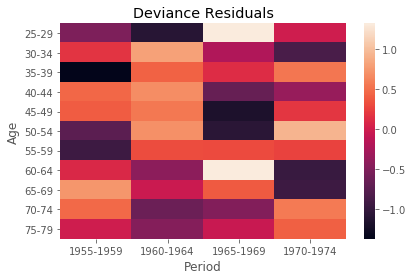

In [14]:
model.plot_residuals(simplify_ranges=False)

In [15]:
model.parameters

,coef,std_err,z,P>|z|
level,1.957546,0.065878,29.714553,4.980900e-194
slope_age,0.504384,0.075220,6.705446,2.007924e-11
slope_coh,0.120879,0.067994,1.777784,7.543934e-02
dd_age_35-39,-0.497117,0.427483,-1.162891,2.448736e-01
dd_age_40-44,0.253907,0.288400,0.880401,3.786423e-01
dd_age_45-49,-0.155115,0.205152,-0.756098,4.495907e-01
dd_age_50-54,-0.205505,0.150426,-1.366154,1.718908e-01
dd_age_55-59,-0.043344,0.118725,-0.365080,7.150515e-01
dd_age_60-64,-0.092603,0.097120,-0.953497,3.403386e-01
dd_age_65-69,0.023606,0.083549,0.282538,7.775312e-01


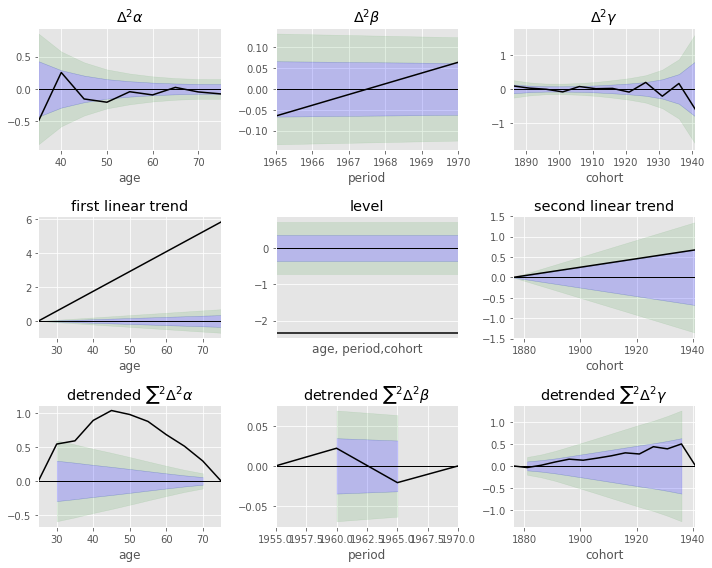

In [16]:
model.plot_parameters(around_coef=False)

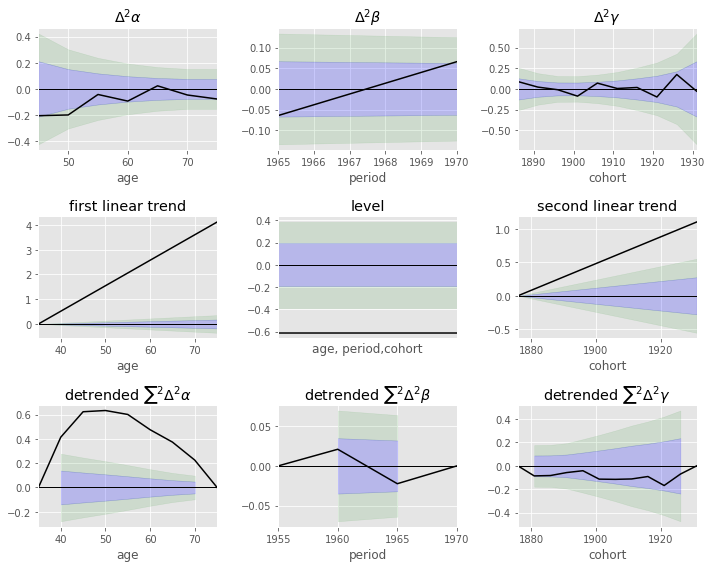

In [20]:
sub_model=model.sub_model(age_from_to=('35-39',None))
sub_model.plot_parameters(around_coef=False)

In [21]:
model.fit_table()
model.deviance_table

,deviance,df_resid,P>chi_sq,LR_vs_APC,df_vs_APC,P>chi_sq
APC,20.225,18,0.320298,NaN,NaN,NaN
AP,25.5579,30,0.697492,5.33293,12,0.945925
AC,21.4537,20,0.370873,1.22876,2,0.540975
PC,99.2285,27,3.44469e-10,79.0035,9,2.54907e-13
Ad,26.5839,32,0.737221,6.35894,14,0.956618
Pd,253.562,39,0,233.337,21,0
Cd,100.712,29,7.52274e-10,80.4873,11,1.18783e-12
A,85.5773,33,1.49555e-06,65.3523,15,2.96382e-08
P,6390.15,40,0,6369.92,22,0
C,1217.03,30,0,1196.81,12,0
